# entropy

entropy of distribution p:

$$entropy := -\sum_{x \in \mathcal{X}} p(x) \log p(x) = \mathbb{E}[-\log p(X)] $$

entropy is a measure of uncertainty.

[Entropy (information theory) - Wikipedia](https://en.wikipedia.org/wiki/Entropy_(information_theory))

# y = -x log(x)

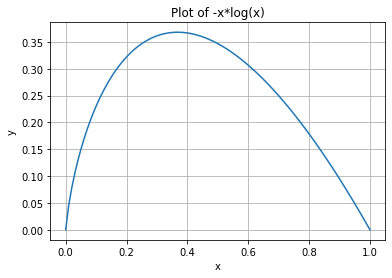

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.00001, 1, 100)  # Generate an array of x values
y = -x * np.log(x)  # Compute the corresponding y values

plt.plot(x, y)  # Plot x*log(x)
plt.xlabel('x')  # Set the x-axis label
plt.ylabel('y')  # Set the y-axis label
plt.title('Plot of -x*log(x)')  # Set the plot title
plt.grid(True)  # Show grid lines
plt.show()  # Show the plot

# compute entropy

In [2]:
# entropy example

# https://pytorch.org/docs/stable/distributions.html

import torch
import torch.nn.functional as F
from torch.distributions import Categorical

# Define a probability distribution
probabilities = torch.tensor([0.4, 0.3, 0.2, 0.1])

distribution = Categorical(probabilities)
entropy = distribution.entropy()
entropy

tensor(1.2799)

In [3]:
# Calculate the log probabilities
log_probs = torch.log(probabilities)

# Calculate the entropy
entropy = -torch.sum(probabilities * log_probs)

# Print the entropy
print("Entropy:", entropy.item())

Entropy: 1.27985417842865


# compute entropys

In [4]:
import torch
from torch.distributions import Categorical

probabilities = torch.tensor([[0.25, 0.25, 0.25, 0.25], [0.4, 0.3, 0.2, 0.1],[0.99, 0.002, 0.003, 0.005]])
distribution = Categorical(probabilities)
entropys = distribution.entropy()
entropys

tensor([1.3863, 1.2799, 0.0663])

In [5]:
entropys.mean()

tensor(0.9108)

# entropy of P is the highest when P is uniform

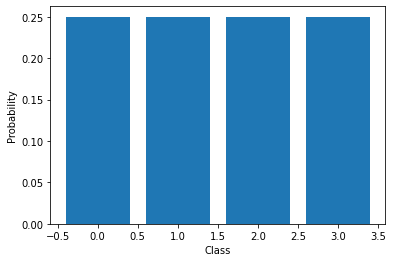

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(range(4), [0.25, 0.25, 0.25, 0.25]) # it is uncertain what occurs
ax.set_xlabel('Class')
ax.set_ylabel('Probability')
plt.show()

# we can prove this by Lagrange multiplier

$$L(p, \lambda) = - \sum_{j=1}^n p_j \log p_j + \lambda (\sum_{j=1}^n p_j - 1) $$
taking derivative with respect to p:
$$L(p, \lambda)/\partial p  = \lambda - 1 - \log p = \mathbf{0}$$
$$ \lambda = 1 + \log p_1 = 1 + \log p_2 = \cdots = 1 + \log p_n  $$
$$ p_1 = p_2 = \cdots = p_n  $$